In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('D:/Study PDF/Python/project/googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6540,BN Pro Black Text on White,LIBRARIES_AND_DEMO,3.9,53,334k,"10,000+",Free,0,Everyone,Libraries & Demo,5-Feb-17,2.3.2,1.6 and up
7132,CB Trader,FINANCE,4.7,11,2.2M,"1,000+",Free,0,Everyone,Finance,11-Apr-18,1.6.1,4.0 and up
4412,Sketch 'n' go,VIDEO_PLAYERS,3.8,3965,6.4M,"100,000+",Free,0,Everyone,Video Players & Editors,26-Mar-18,2.2.9,4.1 and up
2644,"Tagged - Meet, Chat & Dating",SOCIAL,4.1,486830,Varies with device,"10,000,000+",Free,0,Mature 17+,Social,21-Jun-18,Varies with device,Varies with device
127,Facial Wrinkle Reduction,BEAUTY,4.6,184,21M,"10,000+",Free,0,Everyone,Beauty,2-Jul-18,1.5,4.1 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### DATA CLEANING

##### Which columns have null values?

In [4]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

##### 2. Clean the rating columns and the other columns containing null values.

<Axes: >

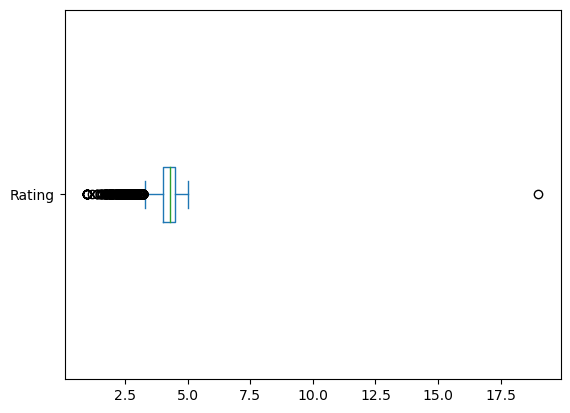

In [5]:
df['Rating'].plot(kind='box', vert=False)

In [6]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [7]:
df.loc[df['Rating'] > 5].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [8]:
df.loc[df['Rating'] >5, 'Rating'] = np.nan

In [9]:
df['Rating'].mean()

4.191757420456972

In [10]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


#####
1. In the first step above we have handle missing value in rating columns by replacing mean value in null.
2. For other columns we have deleted the rows containing null values

##### 3.Clean the column Reviews and make it numeric¶

In [13]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [14]:
df['Reviews Numeric'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [15]:
df.loc[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric


In [16]:
df.iloc[1781]

App                Tomb of the Mask
Category                       GAME
Rating                          4.1
Reviews                       55380
Size                            39M
Installs                 5,000,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                       Action
Last Updated              24-Jul-18
Current Ver                   1.2.1
Android Ver              5.0 and up
Reviews Numeric               55380
Name: 1783, dtype: object

In [17]:
df.loc[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10829 non-null  object 
 1   Category         10829 non-null  object 
 2   Rating           10829 non-null  float64
 3   Reviews          10829 non-null  object 
 4   Size             10829 non-null  object 
 5   Installs         10829 non-null  object 
 6   Type             10829 non-null  object 
 7   Price            10829 non-null  object 
 8   Content Rating   10829 non-null  object 
 9   Genres           10829 non-null  object 
 10  Last Updated     10829 non-null  object 
 11  Current Ver      10829 non-null  object 
 12  Android Ver      10829 non-null  object 
 13  Reviews Numeric  10829 non-null  int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [19]:
df['Reviews Numeric']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews Numeric, Length: 10829, dtype: int64

In [20]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10829 non-null  object 
 1   Category         10829 non-null  object 
 2   Rating           10829 non-null  float64
 3   Reviews          10829 non-null  int64  
 4   Size             10829 non-null  object 
 5   Installs         10829 non-null  object 
 6   Type             10829 non-null  object 
 7   Price            10829 non-null  object 
 8   Content Rating   10829 non-null  object 
 9   Genres           10829 non-null  object 
 10  Last Updated     10829 non-null  object 
 11  Current Ver      10829 non-null  object 
 12  Android Ver      10829 non-null  object 
 13  Reviews Numeric  10829 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


In [22]:
del df['Reviews Numeric']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


##### How many duplicated apps are there?

In [24]:
df.loc[df.duplicated(subset=['App'],keep=False)].sort_values(by='App').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up


In [25]:
df.duplicated(keep=False).sum()

893

In [26]:
df.duplicated(subset=['App'],keep=False).sum()

1979

##### 5.Drop duplicated apps keeping the ones with the greatest number of reviews

In [27]:
#df_copy_5 = df.copy()

In [28]:
df.sort_values(by=['App','Reviews'], inplace=True)

In [29]:
df.drop_duplicates(subset=['App'], keep='last', inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


##### Format the category column

In [35]:
df['Category'].value_counts()

Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

In [32]:
df['Category'] = df['Category'].str.replace("_"," ")

In [34]:
df['Category'] = df['Category'].str.capitalize()

##### Format the installs column and convert it to numeric

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [37]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace("+",'').str.replace(",", ''))

C:\Users\adars\AppData\Local\Temp\ipykernel_2112\2442223533.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace("+",'').str.replace(",", ''))


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.0+ MB


##### 8. Clean and convert size column representing it in bytes
1. m = 1024*1024
2. kb = 1024

In [39]:
#df_copy_8 = df.copy()

In [42]:
df.loc[df['Size'].str.contains('Varies with device')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [41]:
df['Size'] = df['Size'].str.replace('Varies with device',"0")

In [43]:
df.loc[df['Size'].str.contains('k'),'Size'] = (
    pd.to_numeric(
        df.loc[df['Size'].str.contains('k'),'Size'].str.replace('k', '')
    ) * 1024
).astype(str)

In [44]:
df.loc[df['Size'].str.contains('M'),'Size'] = (
    pd.to_numeric(
        df.loc[df['Size'].str.contains('M'),'Size'].str.replace('M', '')
    ) * (1024 * 1024)
).astype(str)

In [48]:
df['Size'] = pd.to_numeric(df['Size'])

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
324,#NAME?,Comics,3.500000,115,9542041.6,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up


check result below :

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


##### Clean and convert price column to numeric

In [51]:
df.loc[df['Price'] != "0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7738,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.500000,10,3984588.8,100,Paid,$1.49,Everyone,Communication,12-May-18,2.1.4,2.1 and up
8219,"10,000 Quotes DB (Premium)",Books and reference,4.100000,70,3670016.0,500,Paid,$0.99,Everyone,Books & Reference,30-Aug-13,1.3,2.1 and up
6760,17th Edition Cable Sizer,Books and reference,4.400000,47,1468006.4,1000,Paid,$3.08,Everyone,Books & Reference,27-May-16,1.22,2.2 and up
7993,2 Amateur ham radio CW Morse code practice key...,Communication,4.800000,6,3670016.0,100,Paid,$1.49,Everyone,Communication,5-Mar-18,1.0.9,1.6 and up
2385,2017 EMRA Antibiotic Guide,Medical,4.400000,12,3984588.8,1000,Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,weather HD,Personalization,4.000000,1546,4718592.0,10000,Paid,$1.99,Everyone,Personalization,26-Feb-14,3.1,2.1 and up
5832,¡Ay Caramba!,Family,4.191757,0,562176.0,1,Paid,$1.99,Everyone,Education,13-Jun-14,1.2,3.0 and up
9828,Égalité et Réconciliation,News and magazines,4.900000,58,3984588.8,500,Paid,$2.99,Everyone,News & Magazines,26-May-18,1.1.1,5.0 and up
7183,Билеты ПДД CD 2019 PRO,Auto and vehicles,4.191757,21,16777216.0,100,Paid,$1.49,Everyone,Auto & Vehicles,27-Jul-18,1.49,4.0 and up


In [55]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

C:\Users\adars\AppData\Local\Temp\ipykernel_2112\476371664.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))


In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0.0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
324,#NAME?,Comics,3.500000,115,9542041.6,10000,Free,0.0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0.0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0.0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0.0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up


### Paid or Free

In [57]:
df['Distribution'] = 'Free'

In [59]:
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'

In [63]:
df.loc[df['Price'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0.0,Everyone,Sports,7-Oct-17,0.22,4.1 and up,Free
324,#NAME?,Comics,3.500000,115,9542041.6,10000,Free,0.0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0.0,Everyone,Social,2-Aug-18,5.03,4.1 and up,Free
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0.0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0.0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,감성학원 BL 첫사랑,Comics,4.400000,190,35651584.0,10000,Free,0.0,Everyone,Comics,17-Nov-17,3.2.1,3.0 and up,Free
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191757,414,61865984.0,100000,Free,0.0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,Free
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18874368.0,1000000,Free,0.0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,Free
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,3355443.2,10000,Free,0.0,Everyone,Tools,21-Oct-17,1,4.2 and up,Free


### Analysis

##### 11. What company has the most reviews?

In [66]:
df.loc[df['Reviews'] == df['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
2544,Facebook,Social,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,Free


##### Which is the category with most uploaded apps?

In [69]:
df['Category'].value_counts()

Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

##### 13. To which category belongs the most expensive app?

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 8884 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
 13  Distribution    9648 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [73]:
df.loc[df['Price'] == 400.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275,7654604.8,10000,Paid,400.0,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up,Paid


##### Lifestyle

##### 14. Whats the name of the most expensive game?

In [79]:
df.loc[df['Category'] == 'Game'].sort_values(by='Price', ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,14-Dec-15,1.0.4,4.0 and up,Paid


##### The World Ends With You

##### Which is most popular finance app?

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 8884 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
 13  Distribution    9648 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.4+ MB


In [82]:
df.loc[df['Category'] == 'Finance'].sort_values(by='Installs', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
5601,Google Pay,Finance,4.2,348132,0.0,100000000,Free,0.0,Everyone,Finance,26-Jul-18,2.70.206190089,Varies with device,Free


###### Google pay

##### What teen game has the most reviews?

In [87]:
df.loc[(df['Category'] == 'Game') & (df['Content Rating'] == 'Teen')].sort_values(by = 'Reviews',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
3912,Asphalt 8: Airborne,Game,4.5,8389714,96468992.0,100000000,Free,0.0,Teen,Racing,4-Jul-18,3.7.1a,4.0.3 and up,Free


##### Ans: Asphalt 8: Airborne

##### What paid game has most reviews?

In [88]:
df.loc[(df['Category'] == 'Game') & (df['Distribution'] == 'Paid')].sort_values(by = 'Reviews',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4034,Hitman Sniper,Game,4.6,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,12-Jul-18,1.7.110758,4.1 and up,Paid


##### Ans: Hitman Sniper

##### 18. How many TB(terabytes) were transfered ( overall) for the most popular Lifestyle app?

In [91]:
app = df.loc[df['Category'] == 'Lifestyle'].sort_values(by = 'Installs', ascending = False).head(1)

In [95]:
app[:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4587,Tinder,Lifestyle,4.0,2789775,71303168.0,100000000,Free,0.0,Mature 17+,Lifestyle,2-Aug-18,9.5.0,4.4 and up,Free


In [97]:
(app['Installs'] * app['Size']) / (1024 * 1024 * 1024 * 1024)

4587    6484.985352
dtype: float64

#####  Ans: 6484